## Машинное обучение 1, ПМИ ФКН ВШЭ

## Семинар 1

## Работа с табличными данными

В машинном обучении, как правило, всё сводится к анализу табличных данных. Начинать мы можем с большого количества сложных таблиц, изображений, текстов или ещё чего-то непростого, но в итоге всё это обычно сводится к одной таблице, где каждый объект описывается набором признаков. Поэтому важно уметь работать с таблицами.

А ещё есть некоторые исследования, показывающие, что в решении задачи интеллектуального анализа данных обычно 20% времени уходит на построение моделей и прочую интересную работу, связанную с тем, что рассказывается у нас на лекциях, а 80% времени специалисты тратят на подготовку и обработку данных. Сюда входит формирование признаков, устранение выбросов и пропусков и т.д. И это тоже, по сути дела, манипуляции с таблицами.

Вывод: важно уметь работать с табличными данными. В Python для этого есть библиотека pandas, которую мы и будем сегодня изучать.

Чаще всего название библиотеки при импорте сокращают до "pd":

In [1]:
import pandas as pd

### Распределение студентов по элективам

Разумно тренироваться на реальных сложных данных. А что может быть более сложным, чем данные, сгенерированные студентами?

Сегодня мы будем работать с анкетами студентов ПМИ 2024 года о том, на какие курсы по выбору они хотят попасть. Данные были анонимизированы: ФИО захешированы с солью, к рейтингам добавлен случайный шум.

*Вопрос: как можно деанонимизировать данные после манипуляций, которые мы проделали? А как бы вы предложили провести анонимизацию?*

У нас есть 2 таблицы (для 3 и 4 курса):

    – 'Timestamp': время получения ответов
    – 'ID': ID студента (может повторяться, если студент больше одного раза заполнял анкету)
    – 'Рейтинг': Кредитно-рейтинговая сумма студента (грубо говоря, сумма оценок студента по всем его дисциплинам с весами — чем дольша шла дисциплина, тем больше вес; подробности тут: https://www.hse.ru/studyspravka/rate/)
    – 'Группа (в формате 222)': Номер группы
    – 'МИ?': 1, если студент распределился на специализацию МИ, или NaN в противном случае (признак важен, поскольку студенты МИ берут осенью два курса по выбору, а студенты остальных специализаций только один)
    – 'Осенний курс по выбору, приоритет 1'
    – 'Осенний курс по выбору, приоритет 2'
    – 'Осенний курс по выбору, приоритет 3'
    – 'Весенний курс по выбору, приоритет 1'
    – 'Весенний курс по выбору, приоритет 2'
    – 'Весенний курс по выбору, приоритет 3'
    – 'Вы заполняете анкету в первый раз?': "Да" или "Нет"
   
Дополнительные столбцы для 4ого курса:
    
    – 'Группа (в формате 213)': Номер группы
    – 'blended-курс': Выбор blended-курса (кол-во мест неограничено)

Загрузим данные (обратите внимание, что мы легко читаем xlsx-файлы):

In [2]:
!wget  -O 'data_3_course.xlsx' -q 'https://www.dropbox.com/scl/fi/o0q2e3knc3eji1su61w6k/data_3_course.xlsx?rlkey=hk4inz3kc9jkrie8wa9hw78bs&dl=1'
!wget  -O 'data_4_course.xlsx' -q 'https://www.dropbox.com/scl/fi/fuwnglir5ui11dw5ls7je/data_4_course.xlsx?rlkey=5c4vgh7oqhqn9zcymfrqid7qe&dl=1'

In [3]:
data3 = pd.read_excel('data_3_course.xlsx')
data4 = pd.read_excel('data_4_course.xlsx')

In [4]:
data3

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737,226,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486,2210,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494,223,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753,225,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685,221,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да
...,...,...,...,...,...,...,...,...,...,...,...,...
265,2024-08-11 22:21:29,b83a61e0fb2b8045ee174646e7f78188f719a480056ba9...,483,225,NaN,Statistical Learning Theory,Основы разработки компьютерных игр,Основы тензорных вычислений,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Лингвистика для программистов,Да
266,2024-08-14 20:22:13,f7ac5672f8d37d26200f773d632ae66487b15380a5425d...,452,228,NaN,Основы информационного поиска,Системы баз данных,Разработка микросервисов на Go,Рекомендательные системы,Дополнительные главы машинного обучения,Машинное обучение в прикладных задачах,Да
267,2024-08-13 15:46:50,096b6c33dc664316be9b5995cf1d1b2ecd490ecf80e78f...,630,2210,NaN,Системы баз данных,Основы информационного поиска,Операционные системы 2,Язык программирования Go,Лингвистика для программистов,Рекомендательные системы,Да
268,2024-08-13 22:56:03,47e3fb70cdeca3e23ec2bff340ab5e8e8053310337cdfe...,579,2210,1.0,Язык SQL,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределе...,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Машинное обучение в прикладных задачах,Да


Посмотрим размер таблицы:

In [5]:
data3.shape

(270, 12)

Для начала будем работать с одной таблицей для 3 курса. Теперь данные хранятся в переменной ```data3```, которая имеет тип [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [6]:
type(data3)

pandas.core.frame.DataFrame

DataFrame можно создать и вручную:

In [7]:
df = pd.DataFrame({
    'AAA': [4, 5, 6, 7],
    'BBB': [10, 20, 30, 40],
    'CCC': [100, 50, 'E', -50]
})
df

,AAA,BBB,CCC
0,4,10,100
1,5,20,50
2,6,30,E
3,7,40,-50


DataFrame можно частично отобразить в jupyter-ноутбуке с помощью методов ```head```(первые строки) и ```sample```(случайные строки):

In [8]:
data3.head(2)

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737,226,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486,2210,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да


In [9]:
data3.sample(5)

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
200,2024-08-11 21:14:37,70b7847978323ede047ee884261c905e192cb5afff2a84...,441,224,NaN,Системы баз данных,Системы баз данных,Системы баз данных,Компьютерные сети,Компьютерные сети,Компьютерные сети,Да
145,2024-08-13 21:35:41,69c23d81afb1431da28fdec9e1edf407dbca5ab0fab273...,823,223,NaN,Введение в платформы данных,Основы тензорных вычислений,Основы тензорных вычислений,NaN,NaN,NaN,Да
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486,2210,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да
262,2024-08-14 22:08:22,60553144cbe31126977f8493bb151028cc76e0112f5437...,783,227,NaN,Введение в платформы данных,Системы баз данных,Язык SQL,Аналитика данных,Язык программирования Go,Лингвистика для программистов,Да
239,2024-08-14 20:22:32,ecdfb01587911e0126aaef721541a52273b28182a07d5d...,474,228,1.0,Основы информационного поиска,Прикладная статистика в машинном обучении,Разработка микросервисов на Go,Рекомендательные системы,Стохастический анализ,Машинное обучение в прикладных задачах,Да


Можно немного залезть во внутренности Jupyter, чтобы отобразить сразу несколько таблиц:

In [10]:
from IPython.display import display
display(data3.sample(3)), display(data3.sample(3))

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
91,2024-08-20 09:06:02,56fe7a974ace3d9db2907da1bcc6ff30a9556b3bf5ef83...,759,227,1.0,Язык SQL,Основы информационного поиска,Принятие решений в условиях риска и неопределе...,Машинное обучение 2,Машинное обучение в прикладных задачах,Рекомендательные системы,Да
14,2024-08-14 17:52:18,0509d2ebe6f32b1240df06926f0f5583d8278d2ddb7a3e...,474,229,NaN,Язык SQL,Statistical Learning Theory,Основы разработки компьютерных игр,Стохастический анализ,Генеративные модели в машинном обучении (углуб...,Лингвистика для программистов,Да
94,2024-08-14 20:35:19,7a4c0608c95f12bd610176724ceedc6c34ed4c9df91997...,566,223,NaN,Язык SQL,Разработка микросервисов на Go,Основы информационного поиска,Дополнительные главы машинного обучения,Лингвистика для программистов,Компьютерные сети,Да


,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
216,2024-08-14 12:41:57,48063f2b2d60f5a28901923e86746f96122326d90baebe...,730,221,NaN,Распределенные системы,Statistical Learning Theory,Системы баз данных,NaN,NaN,NaN,Да
225,2024-08-14 18:02:18,728f5ea9a475b008e3fd66e7cf5fc24a0a0ab1c9d1220b...,745,2210,NaN,Основы разработки компьютерных игр,Основы информационного поиска,Язык SQL,Аналитика данных,Дополнительные главы машинного обучения,Количественные финансы,Да
137,2024-08-14 19:07:03,f8a45fae1196a7e776a6037832417f3260a63483789551...,712,228,NaN,Язык SQL,Язык SQL,Язык SQL,Аналитика данных,Моделирование временных рядов,Дополнительные главы машинного обучения,Да


(None, None)

Если вам очень хочется отобразить все строки таблицы, то можно сделать так:

In [11]:
# pd.options.display.max_rows = 999
# data3

In [12]:
# pd.options.display.max_rows = 20

DataFrame, по сути, является двумерной таблицей с набором полезных методов. Давайте рассмотрим некоторые из них.

```columns``` — возвращает названия колонок

```dtypes``` — типы колонок



In [13]:
data3.columns

Index(['Timestamp', 'ID', 'Рейтинг', 'Группа (в формате 222)', 'МИ?',
       'Осенний курс по выбору, приоритет 1',
       'Осенний курс по выбору, приоритет 2',
       'Осенний курс по выбору, приоритет 3',
       'Весенний курс по выбору, приоритет 1',
       'Весенний курс по выбору, приоритет 2',
       'Весенний курс по выбору, приоритет 3',
       'Вы заполняете анкету в первый раз?'],
      dtype='object')

In [14]:
data3.dtypes

,0
Timestamp,datetime64[ns]
ID,object
Рейтинг,int64
Группа (в формате 222),int64
МИ?,float64
"Осенний курс по выбору, приоритет 1",object
"Осенний курс по выбору, приоритет 2",object
"Осенний курс по выбору, приоритет 3",object
"Весенний курс по выбору, приоритет 1",object
"Весенний курс по выбору, приоритет 2",object


В DataFrame есть несколько способов для обращения к строкам, столбцам и отдельным элементам таблицы: квадратные скобки и методы ```loc```, ```iloc```.

Как обычно, лучший источник знаний об этом — [документация](https://pandas.pydata.org/docs/user_guide/indexing.html).
Ниже краткое содержание.

В метод ```loc``` можно передать значение индекса (число, которое стоит в колонке index) строки, чтобы получить эту строку:

In [15]:
data3.loc[2]

,2
Timestamp,2024-08-13 18:16:33
ID,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...
Рейтинг,494
Группа (в формате 222),223
МИ?,NaN
"Осенний курс по выбору, приоритет 1",Statistical Learning Theory
"Осенний курс по выбору, приоритет 2",Распределенные системы
"Осенний курс по выбору, приоритет 3",Основы тензорных вычислений
"Весенний курс по выбору, приоритет 1",Стохастический анализ
"Весенний курс по выбору, приоритет 2",Специальные разделы матричного анализа


Получили отдельную строчку в виде объекта класса [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):

In [16]:
type(data3.loc[2])

pandas.core.series.Series

А с помощью срезов можно выбрать часть таблицы:

In [17]:
data3.loc[2:4]

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494,223,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753,225,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685,221,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да


Срез в ```loc``` производится по index и включает в себя последний элемент.

Метод ```iloc``` действует похожим образом, но он индексирует элементы не по index, а по порядку в таблице (который может отличаться от index). Например:

In [18]:
subset = data3.sample(5)
subset

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
240,2024-08-11 22:00:34,67b8a000ad9ca08c4c3cba1aee15649119dd2c850bf1b8...,637,222,NaN,Прикладная статистика в машинном обучении,Прикладная статистика в машинном обучении,Прикладная статистика в машинном обучении,Машинное обучение 2,Стохастический анализ,Моделирование временных рядов,Да
93,2024-08-14 21:52:43,5d0e8207e3f62f1b9da9415e276c2e1c77a9f9e756af7d...,542,228,1.0,Язык SQL,Введение в платформы данных,Основы информационного поиска,Генеративные модели в машинном обучении (углуб...,Глубинное обучение в естественных науках,Стохастический анализ,Да
253,2024-08-14 17:21:37,6828d0f6015f0cdead83f4aa7277908a5ec829e9d4c351...,781,228,NaN,Безопасность компьютерных систем,Основы разработки компьютерных игр,Язык SQL,Компьютерные сети,Компьютерные сети,Компьютерные сети,Да
146,2024-08-15 00:01:19,483b71ae65031a193a77626b4b1668b673c821f04806e6...,567,226,NaN,Основы информационного поиска,Разработка микросервисов на Go,Функциональное программирование,Дополнительные главы машинного обучения,Рекомендательные системы,Машинное обучение в прикладных задачах,Да
117,2024-08-20 23:24:23,c49ced15a77a18475d260408e4c522da4cfa5a75826123...,733,222,NaN,Разработка микросервисов на Go,Язык программирования Scala,Принятие решений в условиях риска и неопределе...,Машинное обучение в прикладных задачах,Аналитика данных,Язык программирования Go,Да


Если же вызвать просто ```loc[2]```, то получим ошибку:


In [19]:
# subset.loc[2]

С помощью ```iloc``` тоже можно делать срезы, но в них последний элемент не включается (как и в обычных срезах в Python, **в отличие от loc**):

In [20]:
subset.iloc[2:4]

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
253,2024-08-14 17:21:37,6828d0f6015f0cdead83f4aa7277908a5ec829e9d4c351...,781,228,NaN,Безопасность компьютерных систем,Основы разработки компьютерных игр,Язык SQL,Компьютерные сети,Компьютерные сети,Компьютерные сети,Да
146,2024-08-15 00:01:19,483b71ae65031a193a77626b4b1668b673c821f04806e6...,567,226,NaN,Основы информационного поиска,Разработка микросервисов на Go,Функциональное программирование,Дополнительные главы машинного обучения,Рекомендательные системы,Машинное обучение в прикладных задачах,Да


Срезы можно брать не только по строкам, но и по столбцам. Обратите внимание на различия индексации столбцов в ```loc``` и ```iloc```:

In [21]:
data3.iloc[2:4, 2:6]

,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1"
2,494,223,NaN,Statistical Learning Theory
3,753,225,NaN,Разработка микросервисов на Go


In [22]:
data3.loc[2:4, 'Рейтинг':'Осенний курс по выбору, приоритет 1']

,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1"
2,494,223,NaN,Statistical Learning Theory
3,753,225,NaN,Разработка микросервисов на Go
4,685,221,NaN,Типы в языках программирования


Через квадратные скобки можно обращаться к одной или нескольким колонкам:

In [23]:
data3[['Рейтинг', 'Осенний курс по выбору, приоритет 1']].head(3)

,Рейтинг,"Осенний курс по выбору, приоритет 1"
0,737,Разработка микросервисов на Go
1,486,Распределенные системы
2,494,Statistical Learning Theory


Есть и более интересные способы индексации. Например, давайте выберем студентов из группы 222:

In [24]:
data3[data3['Группа (в формате 222)'] == 222].sample(3)

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
113,2024-08-14 19:07:26,ffe8d06cea1659050c082aaa85799104d7619ca0e2e500...,542,222,NaN,Распределенные системы,Язык программирования Scala,Язык SQL,Машинное обучение 2,Моделирование временных рядов,Стохастический анализ,Да
100,2024-08-14 14:01:42,6ebd1ea86c654d4547d993c441c7e666be45fb38c275ff...,510,222,NaN,Statistical Learning Theory,Основы тензорных вычислений,Интегральные уравнения в задачах математическо...,Комбинаторная оптимизация,Топологический анализ данных,Стохастический анализ,Да
64,2024-08-14 23:21:07,0c20b37d791c8fc9dbaee20dad30d293608c83de64866f...,654,222,NaN,Разработка микросервисов на Go,Системы баз данных,Основы тензорных вычислений,Дополнительные главы машинного обучения,Рекомендательные системы,Генеративные модели в машинном обучении (углуб...,Да


С DataFrame'ами и Series'ами одинаковой структуры можно производить математические операции:

In [25]:
strange_feature = data3['Рейтинг'] ** 2 + data3['Группа (в формате 222)']
strange_feature.head()

,0
0,543395
1,238406
2,244259
3,567234
4,469446


Однако, если бы 'Рейтинг' был представлен в виде строки, мы бы не смогли этого сделать.

In [26]:
data3["Рейтинг"] = data3["Рейтинг"].astype("Int64").astype(str)

strange_feature = data3["Рейтинг"] ** 2 + data3["Группа (в формате 222)"]
strange_feature.head()

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

In [27]:
data3['Рейтинг'].apply(lambda x: float(str(x).replace(',', '.')))

strange_feature = data3['Рейтинг'] ** 2 + data3['Группа (в формате 222)']
strange_feature.head()

TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

Получаем ту же ошибку, ведь метод apply не модифицирует таблицу, а просто возвращает новый столбец. Обходят это обычно так:

In [28]:
data3['Рейтинг'] = data3['Рейтинг'].apply(lambda x: float(x.replace(',', '.')))

strange_feature = data3['Рейтинг'] ** 2 + data3['Группа (в формате 222)']
strange_feature.head()

,0
0,543395.0
1,238406.0
2,244259.0
3,567234.0
4,469446.0


В дальнейшем нам понадобится работать с перцентилями студентов. Чтобы сделать такой столбец, в pandas уже есть подходящий метод:

In [29]:
data3['percentile'] = 1 - data3['Рейтинг'].rank() / data3.shape[0]

# добавим также наш странный признак
data3['new'] = strange_feature

При желании можно удалить любой признак при помоши метода ```drop```:

In [30]:
data3 = data3.drop(columns=['new'])
data3.head()

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?,percentile
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737.0,226,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да,0.144444
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486.0,2210,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да,0.796296
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494.0,223,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да,0.774074
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753.0,225,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да,0.096296
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685.0,221,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да,0.275926


### Разведочный анализ

Теперь изучим наши данные. Вашим домашним заданием будет распределение студентов по курсам, с учётом их предпочтений, рейтинга и ограничений. Начнём к этому готовиться.

Для начала посмотрим еще раз на типы данных и подумаем, надо ли их менять:

In [31]:
data3.dtypes

,0
Timestamp,datetime64[ns]
ID,object
Рейтинг,float64
Группа (в формате 222),int64
МИ?,float64
"Осенний курс по выбору, приоритет 1",object
"Осенний курс по выбору, приоритет 2",object
"Осенний курс по выбору, приоритет 3",object
"Весенний курс по выбору, приоритет 1",object
"Весенний курс по выбору, приоритет 2",object


Вроде бы нет...

А что с таблицей для 4ого курса? Как вы знаете, на ряд курсов студенты 3 и 4 годов обучения отбираются совместно, поэтому надо собрать данные в одну таблицу. *Можно ли это сделать без подготовки?*

In [32]:
data3.head()

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?,percentile
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737.0,226,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да,0.144444
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486.0,2210,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да,0.796296
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494.0,223,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да,0.774074
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753.0,225,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да,0.096296
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685.0,221,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да,0.275926


In [33]:
data4.head()

,Timestamp,ID,Рейтинг,Группа (в формате 213),blended-курс,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?
0,2024-08-12 22:39:56.044,04d6a9ba366ecb91599b034bffd658190a26ffb50a9862...,1456,213,Соревновательный анализ данных,Self-supervised Learning,Генеративные модели на основе диффузии / Diffu...,Глубинное обучение для текстовых данных,Эффективные системы глубинного обучения,Стохастический анализ,Генеративные модели в машинном обучении,Да
1,2024-08-11 22:20:37.000,79c832498df0572a38f095bd7d11d1b9cb724da6c2ffb6...,1038,211,ML System Design,Глубинное обучение в обработке звука,Трансформерные и мультимодальные модели,Глубинное обучение в обработке звука,Эффективные системы глубинного обучения,Стохастический анализ,Эффективные системы глубинного обучения,Нет
2,2024-08-17 15:16:39.459,ce32bd8723aaea1c825fdf83e1b9ba34bfee956d67c154...,1392,214,Соревновательный анализ данных,Типы в языках программирования,Основы информационного поиска,Теория сложных систем,Теория и практика онлайн-экспериментов,Символьные вычисления,Эффективные системы глубинного обучения,Да
3,2024-08-13 23:08:25.000,40fa220a3391298156a31b3f37aced6f9b0becaabdaf2d...,1135,2110,Безопасность систем на базе LLM,Операционные системы 2,Безопасность компьютерных систем,Основы разработки компьютерных игр,Промышленное программирование на Haskell,Методы сжатия и передачи медиаданных,Децентрализованные системы,Да
4,2024-08-14 19:36:16.188,0b66b14bc0fae70f998b76662b70ae2006c2f1ae363534...,923,212,ML System Design,Байесовские методы в машинном обучении,Генеративные модели на основе диффузии / Diffu...,Self-supervised Learning,Методы сжатия и передачи медиаданных,Математические основы нейросетевых моделей,Трехмерное компьютерное зрение,Да


Кажется, рейтинги имеют разные распределения. Проверим это:

In [34]:
data3['Рейтинг'].describe()

,Рейтинг
count,270.000000
mean,601.337037
std,116.383649
min,416.000000
25%,504.000000
50%,597.000000
75%,696.000000
max,1205.000000


In [35]:
data4['Рейтинг'].describe()

,Рейтинг
count,159.000000
mean,1186.754717
std,176.020882
min,897.000000
25%,1034.000000
50%,1193.000000
75%,1334.000000
max,1507.000000


Видно, что квантили в самом деле отличаются — поэтому сами рейтинги не стоит использовать после объединения таблиц, надо работать только с перцентилями. Вычислим их и объединим таблицы с помощью метода ```concat```:

In [36]:
data4['percentile'] = 1 - data4['Рейтинг'].rank() / data4.shape[0]

data = pd.concat([data3, data4])
data.head()

,Timestamp,ID,Рейтинг,Группа (в формате 222),МИ?,"Осенний курс по выбору, приоритет 1","Осенний курс по выбору, приоритет 2","Осенний курс по выбору, приоритет 3","Весенний курс по выбору, приоритет 1","Весенний курс по выбору, приоритет 2","Весенний курс по выбору, приоритет 3",Вы заполняете анкету в первый раз?,percentile,Группа (в формате 213),blended-курс
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737.0,226.0,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да,0.144444,NaN,NaN
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486.0,2210.0,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да,0.796296,NaN,NaN
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494.0,223.0,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да,0.774074,NaN,NaN
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753.0,225.0,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да,0.096296,NaN,NaN
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685.0,221.0,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да,0.275926,NaN,NaN


Теперь для удобства переименуем столбцы (обратите внимание на ```inplace=True```):

In [37]:
data.rename(columns={'Timestamp':'timestamp',
                     'ID':'id',
                     'Рейтинг':'rating',
                     'МИ?':'is_mi',
                     'Группа (в формате 222)':'group_22',
                     'Группа (в формате 213)':'group_21',
                     'Осенний курс по выбору, приоритет 1':'fall_1',
                     'Осенний курс по выбору, приоритет 2':'fall_2',
                     'Осенний курс по выбору, приоритет 3':'fall_3',
                     'Весенний курс по выбору, приоритет 1':'spring_1',
                     'Весенний курс по выбору, приоритет 2':'spring_2',
                     'Весенний курс по выбору, приоритет 3':'spring_3',
                     'Вы заполняете анкету в первый раз?':'is_first_time',
                     'blended-курс':'blended'},
           inplace=True)

Поскольку у (почти всех) столбцов теперь названия являются корректными именами переменных в Python, мы можем использовать ещё один способ обращения к столбцам таблицы как к полям класса:

In [38]:
data

,timestamp,id,rating,group_22,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended
0,2024-08-12 00:01:06.000,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737.0,226.0,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да,0.144444,NaN,NaN
1,2024-08-14 00:00:22.000,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486.0,2210.0,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да,0.796296,NaN,NaN
2,2024-08-13 18:16:33.000,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494.0,223.0,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да,0.774074,NaN,NaN
3,2024-08-14 10:22:37.000,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753.0,225.0,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да,0.096296,NaN,NaN
4,2024-08-14 20:52:05.000,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685.0,221.0,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да,0.275926,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2024-08-14 11:18:13.362,626f3ae963a471fc69b71e2f5ac3f5f8de93c37c8d6bf0...,1160.0,NaN,NaN,Дизайн систем,Операционные системы 2,Основы информационного поиска,Промышленное программирование на Haskell,Децентрализованные системы,Методы сжатия и передачи медиаданных,Да,0.553459,216.0,Протоколы доказательств с нулевым разглашением
155,2024-08-14 21:40:08.000,07816e53236a6a9993a3b100de9899fc601feb555445b2...,999.0,NaN,NaN,Основы информационного поиска,Введение в платформы данных,Язык программирования Scala,Промышленное программирование на Haskell,Методы сжатия и передачи медиаданных,Обучение с подкреплением,Да,0.795597,215.0,Безопасность систем на базе LLM
156,2024-08-19 11:49:43.000,77b2b19d26b7f160c1938369197f7cac590b2e0cfcac3b...,1232.0,NaN,NaN,Принятие решений в условиях риска и неопределе...,Основы разработки компьютерных игр,Введение в платформы данных,Теория и практика онлайн-экспериментов,Конфликты и кооперация (преподается на английс...,Децентрализованные системы,Да,0.440252,212.0,Соревновательный анализ данных
157,2024-08-13 14:58:30.000,6dafd9a56d08aeb419166d314b0cd6f3107ae5e8dbd636...,961.0,NaN,NaN,Основы информационного поиска,Дизайн систем,Язык программирования Scala,Промышленное программирование на Haskell,Методы сжатия и передачи медиаданных,Децентрализованные системы,Да,0.858491,215.0,Безопасность систем на базе LLM


Нередко работы с данными начинают с поиска пропущенных значений (NaN и др.) и их заполнения. Для начала посмотрим на их наличие:

In [39]:
data.isna().sum()

,0
timestamp,0
id,0
rating,0
group_22,159
is_mi,403
fall_1,0
fall_2,0
fall_3,0
spring_1,48
spring_2,48


Видно, что тут содержательных пропусков нет — есть только проблемы с колонками, специфичными для одного из курсов.

Заполнять пропуски необходимо в соответствии со смыслом колонки. Можно заполнять с помощью среднего, медианного, константного или других значений. Для этого обычно используется метод ```fillna()``` с которым вы познакомитесь в домашнем задании.

Также для разведочного анализа может помочь метод ```groupby(column)```.

Он группирует объекты по указанной(-ым) колонке(-ам). Необходимо также указать какую статистику для группировки выводить. Это может быть количество (count), среднее (mean) или другие. Из огромной функциональности этого метода разберем только несколько базовых приемов:

In [40]:
data.groupby('fall_1').count()[['id', 'is_mi']]

,id,is_mi
fall_1,,
Self-supervised Learning,7,0
Statistical Learning Theory,26,1
Байесовские методы в машинном обучении,23,0
Безопасность компьютерных систем,17,3
Введение в платформы данных,19,0
Генеративные модели на основе диффузии / Diffusion-Based Generative Models,1,0
Глубинное обучение в анализе графовых данных,2,0
Глубинное обучение в обработке звука,23,0
Глубинное обучение для текстовых данных,16,0


*Какие выводы вы можете сделать отсюда?*

Сделаем ```groupby``` с усреднением:

In [41]:
data.groupby("fall_1").mean(numeric_only=True)

,rating,group_22,is_mi,percentile,group_21
fall_1,,,,,
Self-supervised Learning,1255.142857,NaN,NaN,0.386792,212.571429
Statistical Learning Theory,542.000000,224.160000,1.0,0.697095,213.000000
Байесовские методы в машинном обучении,1049.782609,NaN,NaN,0.722450,212.217391
Безопасность компьютерных систем,792.235294,509.071429,1.0,0.306304,846.666667
Введение в платформы данных,895.842105,226.166667,NaN,0.338852,217.000000
Генеративные модели на основе диффузии / Diffusion-Based Generative Models,971.000000,NaN,NaN,0.836478,212.000000
Глубинное обучение в анализе графовых данных,1234.000000,NaN,NaN,0.426101,211.500000
Глубинное обучение в обработке звука,1182.391304,NaN,NaN,0.503828,212.086957
Глубинное обучение для текстовых данных,1286.062500,NaN,NaN,0.333923,214.000000


Отсюда мы узнаём среднюю перцентиль для того или иного курса по выбору.
Обратите внимание, что средний рейтинг тут не очень показателен из-за разных его распределений у разных годов обучения.

Что выводится в следующей строке?

In [42]:
data.groupby(by='fall_1').count()[['group_21', 'group_22']].sum(axis=1)

,0
fall_1,
Self-supervised Learning,7
Statistical Learning Theory,26
Байесовские методы в машинном обучении,23
Безопасность компьютерных систем,17
Введение в платформы данных,19
Генеративные модели на основе диффузии / Diffusion-Based Generative Models,1
Глубинное обучение в анализе графовых данных,2
Глубинное обучение в обработке звука,23
Глубинное обучение для текстовых данных,16


Полезным бывает посмотреть на основные статистики по каждому *числовому*  признаку (столбцу). Метод ```describe``` позволяет быстро сделать это:

In [43]:
data.describe()

,timestamp,rating,group_22,is_mi,percentile,group_21
count,429,429.000000,270.000000,26.0,429.000000,159.000000
mean,2024-08-14 06:03:33.612967168,818.310023,416.311111,1.0,0.497669,345.207547
min,2024-08-11 21:14:12,416.000000,221.000000,1.0,0.000000,211.000000
25%,2024-08-13 16:16:55,558.000000,223.000000,1.0,0.248428,212.000000
50%,2024-08-14 15:21:31,712.000000,226.000000,1.0,0.496296,214.000000
75%,2024-08-14 21:28:57.280999936,1081.000000,228.000000,1.0,0.744444,216.000000
max,2024-08-23 16:40:22.121000,1507.000000,2210.000000,1.0,0.996296,2110.000000
std,NaN,316.354704,586.608810,0.0,0.289004,482.652168


*Какие элементы таблицы выше могут быть полезны? Для чего?*

Студентам специализации МОП (машинное обучение и приложения) нельзя выбирать курс "Машинное обучение 2" в качестве весеннего курса по выбору. Давайте проверим, есть ли те, кто попытался:

In [44]:
!wget  -O 'ml_students_anon.xlsx' -q 'https://www.dropbox.com/scl/fi/qhmxipslxdnhb7tuk14cn/ml_students.xlsx?rlkey=iwg1kxdig6nl2rul3idlo5fij&dl=1'

ml_students = pd.read_excel('ml_students_anon.xlsx')
ml_students.head()

,id,is_ml_student
0,01d7c005dacd8c0be29bae8672b92be43c8cd0bd5b0af9...,True
1,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,True
2,03e2f673656b6649c74d58431f7766aeba77c1dcc92fbe...,True
3,03fa81860250eb001e0eb9fa5a17835b43bab735d0aef7...,True
4,04d6a9ba366ecb91599b034bffd658190a26ffb50a9862...,True


Если вы знакомы с SQL, то знаете, что там крайне часто используется операция JOIN для соединения нескольких таблиц по тому или иному значению. В pandas такое тоже есть, функция называется ```merge```.

У нас есть две таблицы: (1) приоритеты студентов по элективам и (2) специализации, на которые распределены студенты. Эти таблицы содержат разную информацию про студентов, но в обеих конкретный студент имеет один и тот же ID. Допустим, мы теперь хотим соединить эти таблицы — то есть получить новую таблицу, в которой для каждого студента есть информация и о приоритетах по элективам, и о его специализации. Как раз для этого и понадобится операция ```merge```.

Идея соединения таблиц также отражена на картинке ниже.

<img src="https://i.imgur.com/WYyBFTE.png" style="width: 400px">

In [45]:
data = data.merge(ml_students, on='id', how='left')
data.head()

,timestamp,id,rating,group_22,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended,is_ml_student
0,2024-08-12 00:01:06,8a95d7276b95b8b9c4cf8a5b402e98617ad7452977f6e6...,737.0,226.0,NaN,Разработка микросервисов на Go,Язык SQL,Распределенные системы,Компьютерные сети,Язык программирования Go,Промышленное программирование на языке Java,Да,0.144444,NaN,NaN,NaN
1,2024-08-14 00:00:22,289897d0cf42b4b42c50300f94b8b86f913174ae972d96...,486.0,2210.0,NaN,Распределенные системы,Основы информационного поиска,Основы разработки компьютерных игр,Рекомендательные системы,Дополнительные главы машинного обучения,Стохастический анализ,Да,0.796296,NaN,NaN,True
2,2024-08-13 18:16:33,01f548f29a80a6f35b8ce1bdfdf723e2ba70a9c074c2f9...,494.0,223.0,NaN,Statistical Learning Theory,Распределенные системы,Основы тензорных вычислений,Стохастический анализ,Специальные разделы матричного анализа,Математические основы нейросетевых моделей,Да,0.774074,NaN,NaN,True
3,2024-08-14 10:22:37,68e3e62f6e017e43094bb63b4dde0b0229564cece838b5...,753.0,225.0,NaN,Разработка микросервисов на Go,Язык SQL,Безопасность компьютерных систем,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Промышленное программирование на языке Java,Да,0.096296,NaN,NaN,NaN
4,2024-08-14 20:52:05,aac63ca42c5701a219d0e4f3289e17ed3160d5a2279790...,685.0,221.0,NaN,Типы в языках программирования,Основы информационного поиска,Системы баз данных,Дополнительные главы машинного обучения,Генеративные модели в машинном обучении (углуб...,Моделирование временных рядов,Да,0.275926,NaN,NaN,True


In [46]:
data[(data['is_ml_student'] == True) &
     (
         (data['spring_1'] == 'Машинное обучение 2') | \
         (data['spring_2'] == 'Машинное обучение 2') | \
         (data['spring_3'] == 'Машинное обучение 2')
     )
]

,timestamp,id,rating,group_22,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,group_21,blended,is_ml_student
80,2024-08-14 16:20:33,7935540b095acdf82e4baf21202af7afaf27e4ec193766...,437.0,224.0,NaN,Основы тензорных вычислений,Statistical Learning Theory,Функциональное программирование,Стохастический анализ,Генеративные модели в машинном обучении (углуб...,Машинное обучение 2,Да,0.933333,NaN,NaN,True
168,2024-08-14 13:58:43,6a43e43c97292ddc20ee6204067168247e89eb0344adea...,439.0,222.0,NaN,Прикладная статистика в машинном обучении,Statistical Learning Theory,Системы баз данных,Генеративные модели в машинном обучении (углуб...,Компьютерные сети,Машинное обучение 2,Да,0.927778,NaN,NaN,True


Попробуем понять, есть ли явная зависимость между рейтингом и номером группы. Для начала посмотрим на корреляции (функция corr считает по умолчанию корреляцию Пирсона):

In [47]:
corrmat = data[['rating', 'group_22', 'group_21']].corr()
corrmat

,rating,group_22,group_21
rating,1.000000,0.032703,0.093151
group_22,0.032703,1.000000,NaN
group_21,0.093151,NaN,1.000000


*Проинтерпретируйте результаты. Можно ли им доверять, разумно ли смотреть на корреляции?*

Здесь числовых признаков не так много, но на практике их бывают десятки, а то и сотни. В таком случае бывает полезно посмотреть на эту матрицу корреляций в виде heatmap:

In [48]:
# импорт библиотек для графиков
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

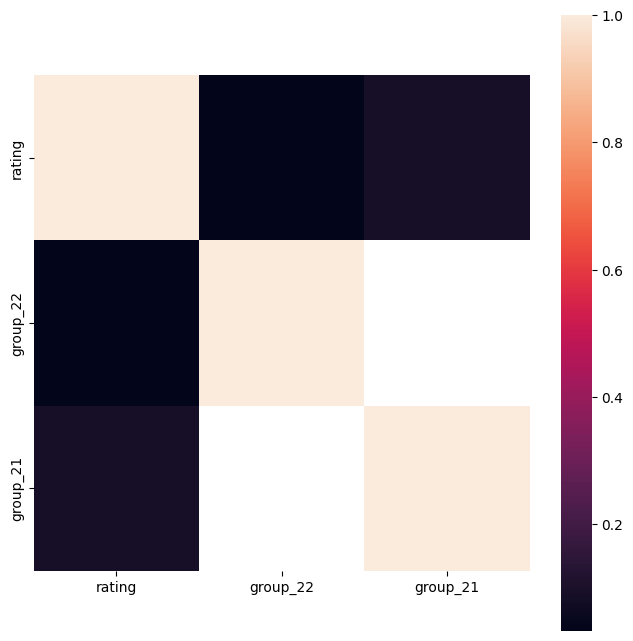

In [49]:
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, square=True)
plt.show()

К графикам надо относиться серьёзно, они должны быть понятными и информативными. Рассмотрим несколько примеров.

*Прокомментируйте что вам кажется хорошим и плохим на данных графиках.*

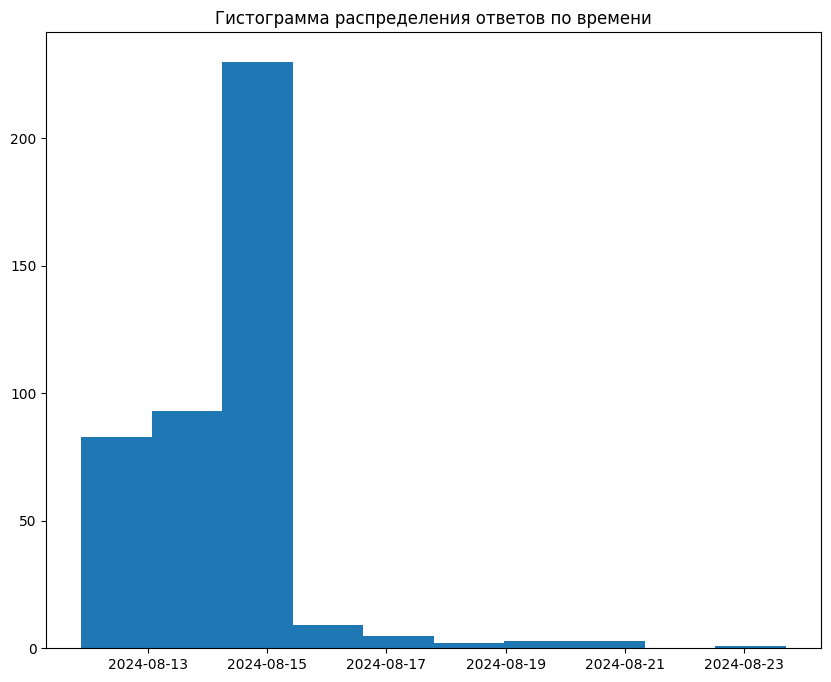

In [50]:
plt.figure(figsize=(10, 8))

plt.hist(data['timestamp'])
plt.title('Гистограмма распределения ответов по времени')
plt.show()

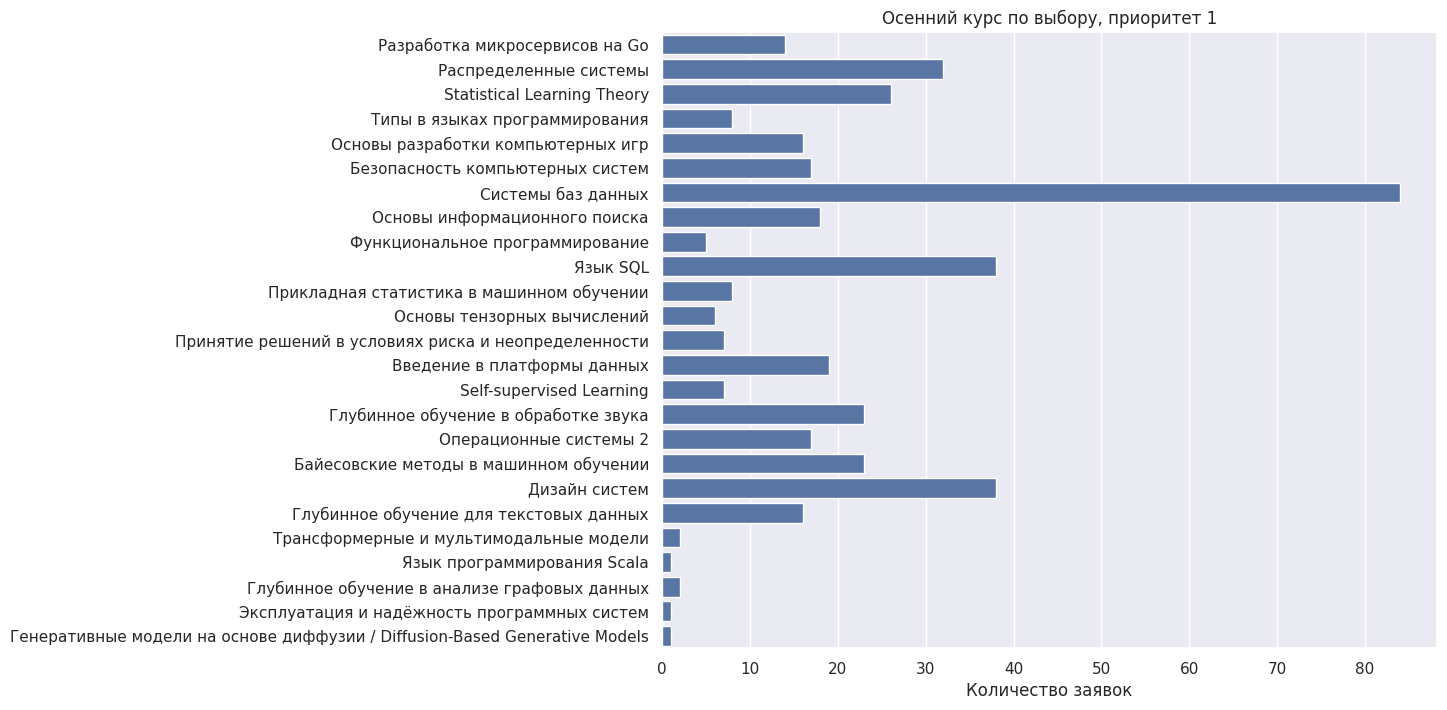

In [51]:
sns.set()

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(y='fall_1', data=data)
ax.set_title('Осенний курс по выбору, приоритет 1')
ax.set_ylabel('')

ax.set(xlabel='Количество заявок')


plt.show()

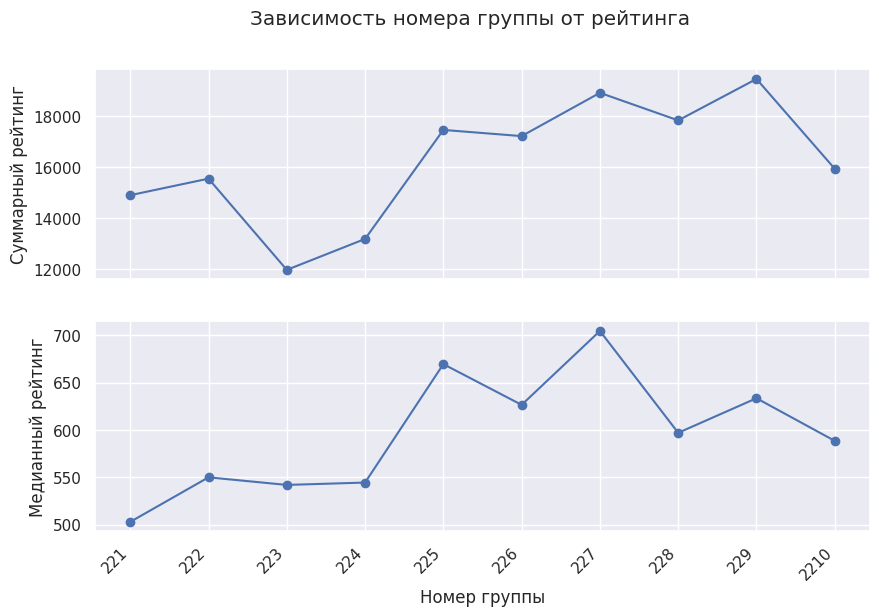

In [90]:
crs3 = data[data['group_21'].isna()].copy()
crs3['rating'] = pd.to_numeric(crs3['rating'], errors='coerce')

gr_med = crs3.groupby('group_22')['rating'].median()
gr_sum = crs3.groupby('group_22')['rating'].sum()

order = sorted(gr_sum.index.dropna())
y_sum = gr_sum.loc[order].values
y_med = gr_med.loc[order].values

x = np.arange(len(order))
labels = [str(int(g)) for g in order]

fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
fig.suptitle('Зависимость номера группы от рейтинга')

axs[0].plot(x, y_sum, marker='o')
axs[0].set_ylabel('Суммарный рейтинг')

axs[1].plot(x, y_med, marker='o')
axs[1].set_ylabel('Медианный рейтинг')
axs[1].set_xlabel('Номер группы')
axs[1].set_xticks(x)
axs[1].set_xticklabels(labels, rotation=45, ha='right')

plt.show()


Если вы будете делать графики без подписанных осей, с налезающими друг на друга метками, неаккуратными линиями и т.д., то имеете все шансы попасть сюда: https://t.me/funny_homeworks

Сохраним полученную таблицу, чтобы вы могли продолжить с ней работу дома:

In [53]:
data.to_excel('end_seminar.xlsx', index=False)

### Разведочный анализ данных

Решение любой задачи, связанной с машинным обучением, начинается с разведочного анализа данных. Перед тем, как строить модели, надо понять, сколько у нас данных и какая информация есть о каждом объекте, а также:
* выяснить, нет ли пропусков в данных (т.е. отсутствующих значений признаков у некоторых объектов)
* выяснить, нет ли выбросов (т.е. объектов, которые очень сильно отличаются от большинства, имеют неадекватные значения признаков)
* выяснить, нет ли повторов в данных
* выяснить, нет ли нелогичной информации (например, если мы анализируем данные по кредитам, и видим запись, где кредит выдали пятилетнему ребёнку, то это странно)

И это лишь небольшой список проблем, которые можно выявить. Помимо этого с данными нужно в целом познакомиться, чтобы понять, какие признаки там можно сделать, какие из них будут наиболее полезны.

Попробуем провести такой анализ на реальной задаче предсказания продолжительности поездки на такси в Нью-Йорке: https://www.kaggle.com/c/nyc-taxi-trip-duration/overview

Рассказ во многом взят из ноутбука https://www.kaggle.com/gaborfodor/from-eda-to-the-top-lb-0-367/notebook

In [54]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
import seaborn as sns

Загрузим данные и изучим доступные нам признаки.

In [55]:
!wget  -O 'train.csv' -q 'https://www.dropbox.com/s/en5f9nhn915cnkf/_train.csv?dl=0'

In [56]:
train = pd.read_csv('train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Смысл столбцов:

* id - идентификатор поездки
* vendor_id - код провайдера, от которого пришла информация о поездке
* pickup_datetime - время старта поездки
* dropoff_datetime - время окончания поездки
* passenger_count - число пассажиров (вводится водителем)
* pickup_longitude - долгота точки посадки
* pickup_latitude - широта точки посадки
* dropoff_longitude - долгота точки высадки
* dropoff_latitude - долгота точки высадки
* store_and_fwd_flag - равно Y, если информация о поездке какое-то время хранилась в памяти таксометра из-за отсутствия связи; иначе принимает значение N
* trip_duration - продолжительность поездки в секундах

In [57]:
train.shape

(1458644, 11)

Данных довольно много, поэтому нужно задумываться об эффективности всех вычислений. Ниже мы увидим на примере, что правильное использование возможностей pandas позволит существенно ускорить вычисления.

Посмотрим внимательно на столбцы из нашей таблицы и попробуем проверить, нет ли там противоречий и проблем. Например, в голову приходят следующие вопросы:
* можно ли считать ID уникальным идентификатором поездки, или же есть записи с одинаковыми ID?
* есть ли где-то пропуски?
* действительно ли столбец store_and_fwd_flag принимает только значения Y и N?

In [58]:
print('Id is unique.') if train.id.nunique() == train.shape[0] else print('oops')

Id is unique.


In [59]:
print('We do not need to worry about missing values.') if train.count().min() == train.shape[0] else print('oops')

We do not need to worry about missing values.


In [60]:
print('The store_and_fwd_flag has only two values {}.'.format(str(set(train.store_and_fwd_flag.unique()))))

The store_and_fwd_flag has only two values {'Y', 'N'}.


Посмотрим на типы данных в каждом столбце.

In [61]:
train.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,object
dropoff_datetime,object
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,object


Видно, что pandas отнёс столбцы с датами к общему типу object. Будет лучше привести их к типу datetime, чтобы использовать удобные функции для манипуляций с датами. Заодно сделаем проверку — действительно ли столбец check_trip_duration показывает продолжительность поездки, или же он входит в противоречие со столбцами pickup_datetime и dropoff_datetime.

In [62]:
train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train.loc[:, 'pickup_date'] = train['pickup_datetime'].dt.date
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
train['store_and_fwd_flag'] = 1 * (train.store_and_fwd_flag.values == 'Y')
train['check_trip_duration'] = (train['dropoff_datetime'] - train['pickup_datetime']).map(lambda x: x.total_seconds())
duration_difference = train[np.abs(train['check_trip_duration'].values  - train['trip_duration'].values) > 1]
print('Trip_duration and datetimes are ok.') if len(duration_difference[['pickup_datetime', 'dropoff_datetime', 'trip_duration', 'check_trip_duration']]) == 0 else print('Ooops.')

Trip_duration and datetimes are ok.


In [63]:
train.dtypes

,0
id,object
vendor_id,int64
pickup_datetime,datetime64[ns]
dropoff_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
store_and_fwd_flag,int64


In [64]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,2016-03-14,455.0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,2016-06-12,663.0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,2016-01-19,2124.0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,2016-04-06,429.0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,2016-03-26,435.0


Ещё имеет смысл проверить целевую переменную trip_duration. Нет ли там выбросов? Какими по продолжительности бывают поездки? Выглядит ли распределение этой переменной осмысленно?

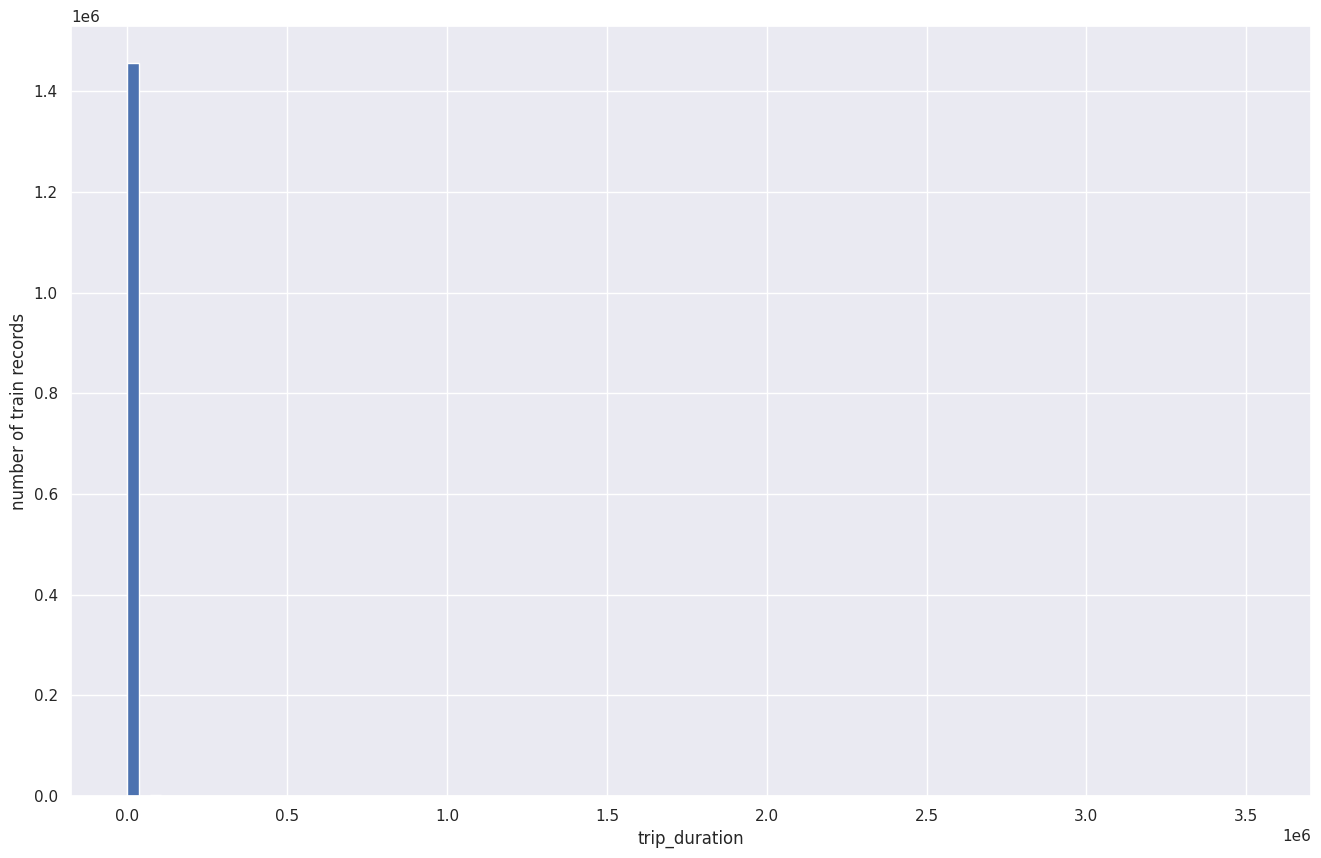

In [65]:
plt.hist(train['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.show()

Когда в каком-то столбце распределение имеет тяжёлые хвосты или есть выбросы, обычные гистограммы не очень информативны. В этом случае может быть полезно нарисовать распределение в логарифмической шкале.

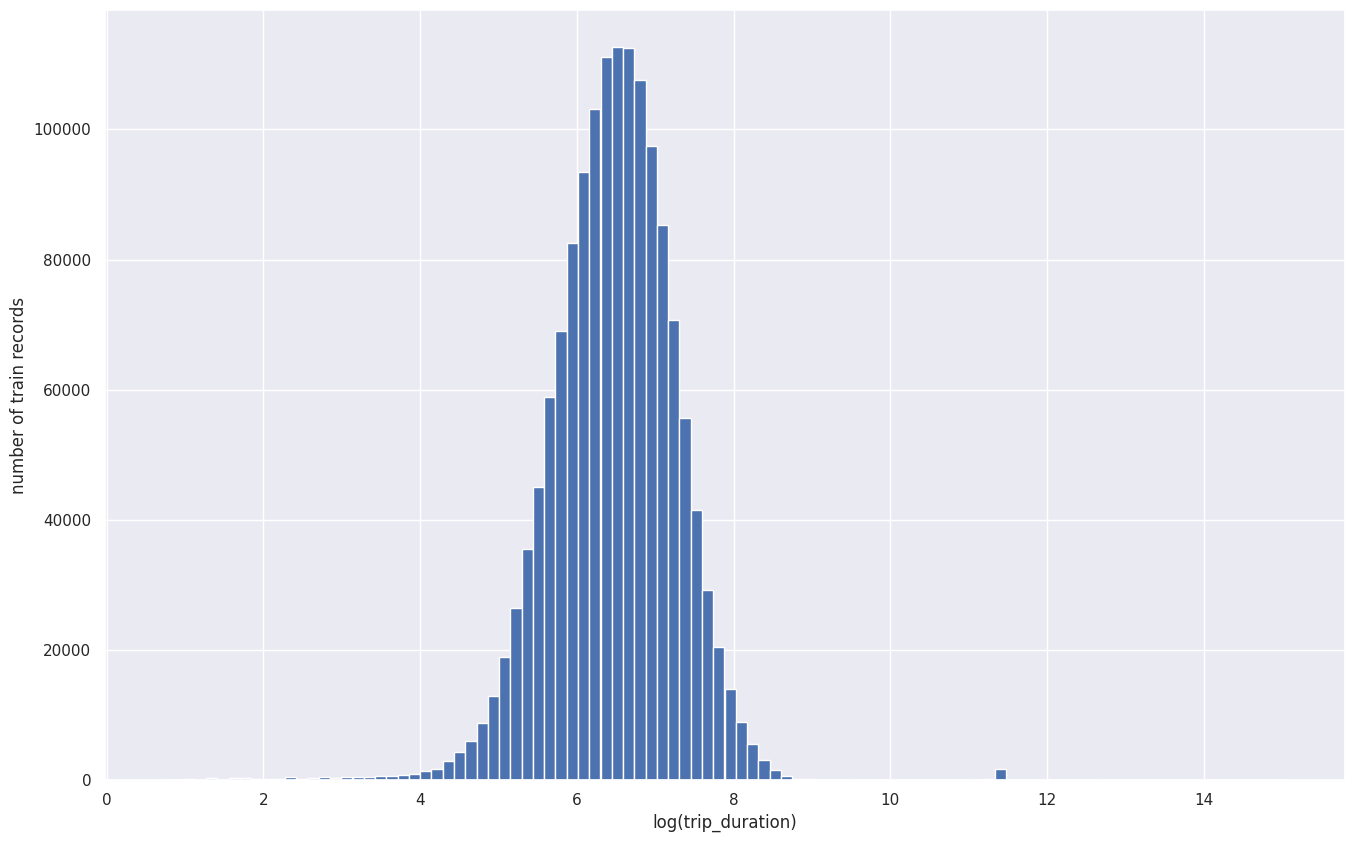

In [66]:
train['log_trip_duration'] = np.log1p(train['trip_duration'].values)
plt.hist(train['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

В целом распределение разумное, продолжительность поездки находится примерно в следующем интервале:

In [67]:
print("В секундах:", np.exp(5), np.exp(9))
print("В минутах:", np.exp(5) // 60, np.exp(9) // 60)

В секундах: 148.4131591025766 8103.083927575384
В минутах: 2.0 135.0


Самая длинная поездка (в часах):

In [68]:
train['trip_duration'].max() // 3600

979

In [69]:
train[train.trip_duration >= 979 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,0,3526282,2016-02-13,3526282.0,15.075755


Это выброс. Мог сломаться таксометр, водитель мог забыть остановить поездку по каким-то причинам и т.д. В любом случае, будет странно обучаться на таких данных, обычно их выкидывают из выборки. Кандидатов на выбрасывание не так уж много — например, если взять поездки длиной 10 часа и больше, то их окажется около двух тысяч, и определённо надо выяснять, что это такое.

In [70]:
train[train.trip_duration >= 10 * 3600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,check_trip_duration,log_trip_duration
531,id3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,0,84594,2016-02-20,84594.0,11.345630
1134,id1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,0,86149,2016-05-07,86149.0,11.363845
1865,id3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,0,86352,2016-06-07,86352.0,11.366199
3442,id1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,0,86236,2016-02-13,86236.0,11.364855
4172,id3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,0,85197,2016-03-18,85197.0,11.352733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455097,id2798196,2,2016-03-20 03:51:36,2016-03-21 00:00:00,2,-73.969299,40.757301,-73.870277,40.709808,0,72504,2016-03-20,72504.0,11.191411
1456458,id2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,0,86233,2016-02-08,86233.0,11.364820
1457207,id1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,0,85311,2016-06-08,85311.0,11.354070
1457752,id1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,0,86314,2016-02-02,86314.0,11.365759


Попробуем нарисовать, откуда обычно стартуют поездки.

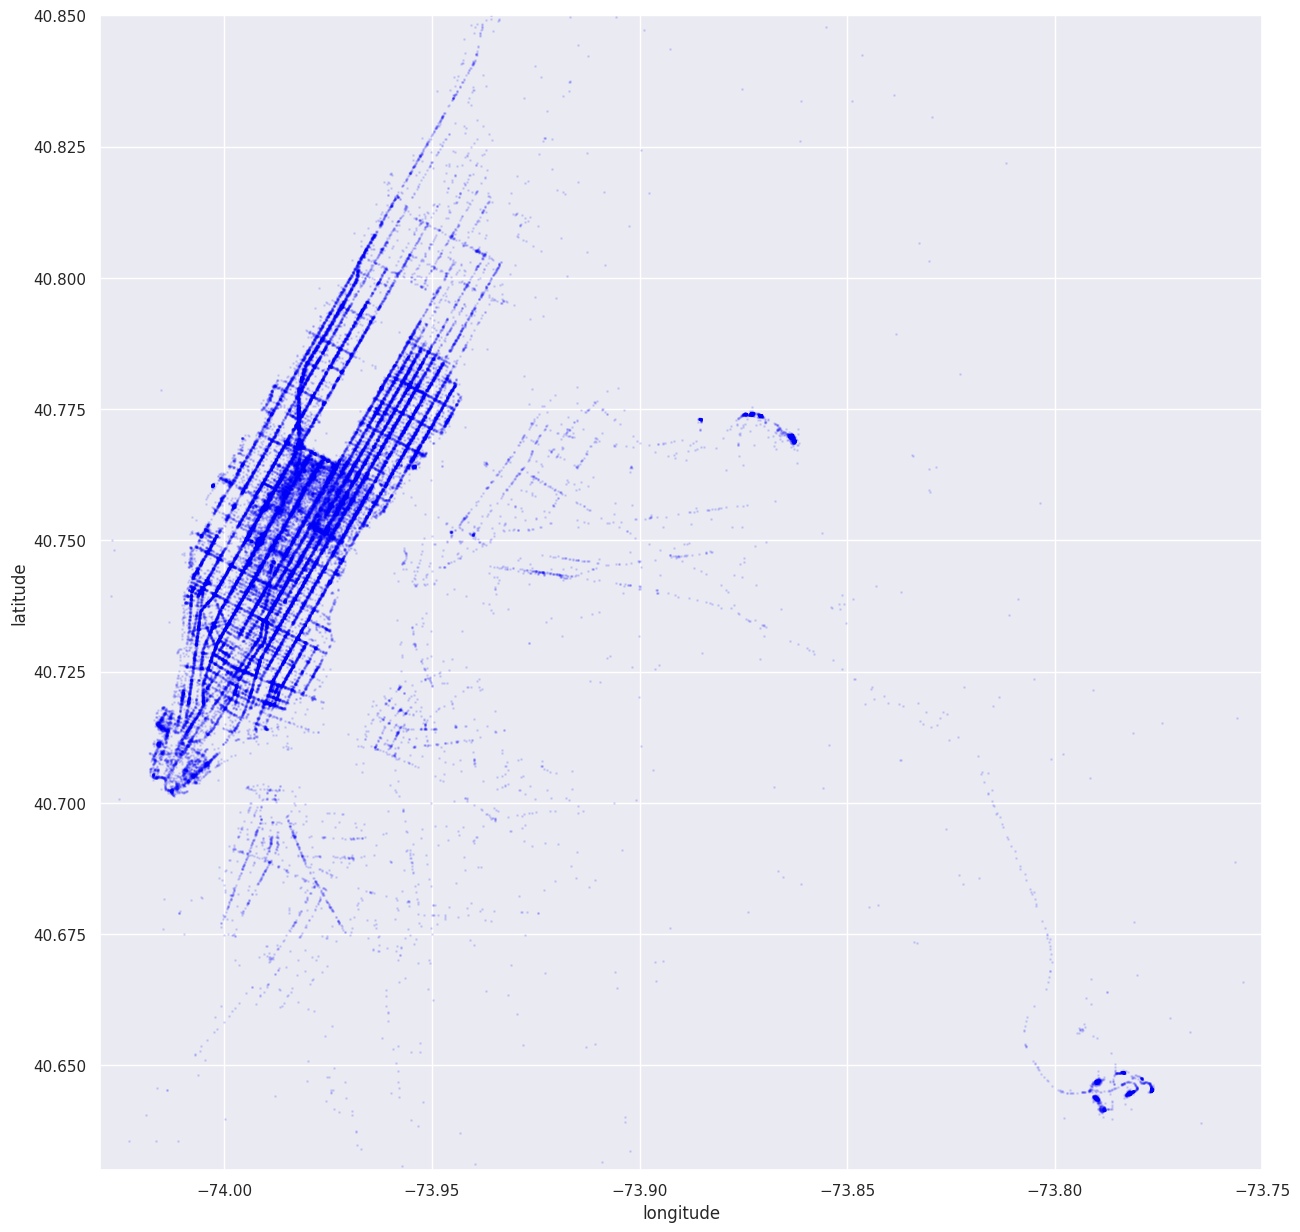

In [71]:
N = 100000
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.figure(figsize=(15,15))
plt.scatter(train['pickup_longitude'].values[:N], train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Теперь нарисуем как следует, на карте.

In [72]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [73]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.

    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [74]:
show_circles_on_map(train.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[np.float64(40.751166320800785), np.float64(-73.97466761779785)], controls=(ZoomControl(options=['p…

Кстати, случайный ли порядок записей в таблице? Это важно понимать, например, для разбиения выборки на обучающую и тестовую части. Если порядок не является случайным, а мы отнесём к обучающей части первую половину таблицы, то есть риск, что данные в обучении и тесте будут иметь разные распределения, а значит, модель сможет хорошо работать только на одной из частей.

Text(0, 0.5, 'Дней с момента ранней поездки')

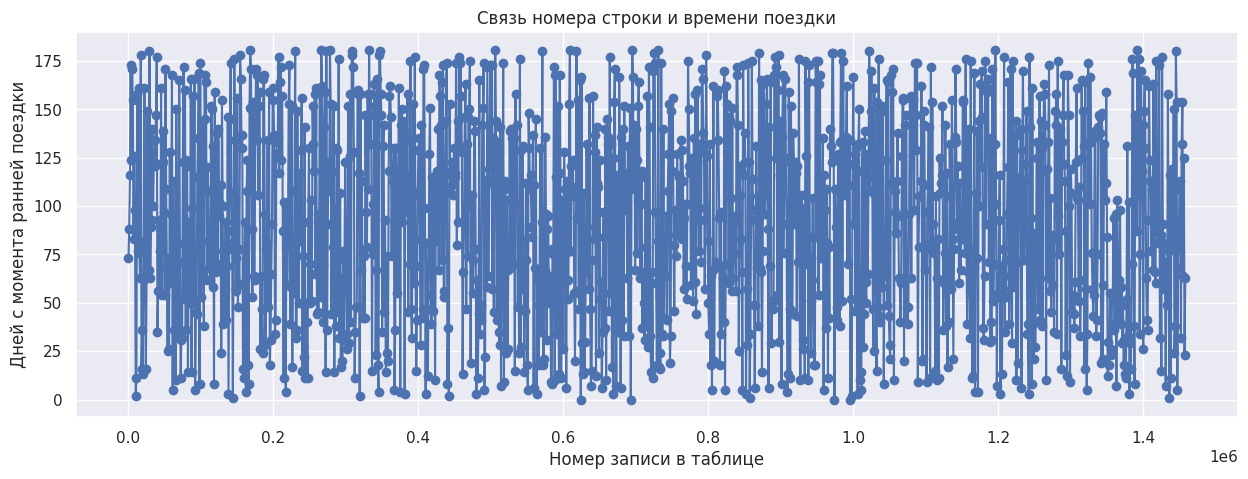

In [75]:
plt.figure(figsize=(15,5))
days_since_min_ride = (train['pickup_datetime'] - train['pickup_datetime'].min()).apply(lambda x: x.total_seconds() // (60*60*24))
plt.plot(days_since_min_ride[::1000], 'o-')
plt.title('Связь номера строки и времени поездки')
plt.xlabel('Номер записи в таблице')
plt.ylabel('Дней с момента ранней поездки')

Вроде бы всё довольно случайно.

Посчитаем какие-нибудь признаки. Скорее всего продолжительность поездки неплохо зависит от расстояния — посчитаем его. Кстати, важно заметить, что само расстояние не может быть признаком, поскольку в тестовой выборке нет информации о пункте назначения. Но мы пока исследуем данные и, может, увидим в расстояниях что-то интересное.

Можно выбрать научный подход и посчитать честное расстояние на сфере между двумя точками. Это называется [haversine distance](https://en.wikipedia.org/wiki/Haversine_formula).

Можно решить, что Земля плоская, и считать стандартные расстояния. В этом случае очень неплохо подойдёт [манхэттенское расстояние](https://en.wikipedia.org/wiki/Taxicab_geometry) — оно учитывает, что машины всё-таки не летают.

In [76]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def dummy_manhattan_distance(lat1, lng1, lat2, lng2):
    a = haversine_array(lat1, lng1, lat1, lng2)
    b = haversine_array(lat1, lng1, lat2, lng1)
    return a + b

train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)
train.loc[:, 'distance_dummy_manhattan'] = dummy_manhattan_distance(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

Обсудим немного скорость вычислений в pandas. Есть несколько способов применить функцию к каждой строке в таблице. Если вы до этого изучали преимущественно C/C++, то первое, что должно прийти вам в голову, — написать цикл.

In [77]:
train1 = train.copy()

In [78]:
%%timeit

for i in range(100):
    train1[i, 'distance_haversine'] = haversine_array(train1['pickup_latitude'].iloc[i],
                                                      train1['pickup_longitude'].iloc[i],
                                                      train1['dropoff_latitude'].iloc[i],
                                                      train1['dropoff_longitude'].iloc[i])

<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
<magic-timeit>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame

182 ms ± 10.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Обратите внимание, что мы посчитали расстояния всего лишь для первых 100 записей, и это уже было не очень быстро.

Можно воспользоваться функцией ```apply```.

In [79]:
%%timeit

train1.iloc[:5000, :].apply(lambda x:
                            haversine_array(x['pickup_latitude'],
                                            x['pickup_longitude'],
                                            x['dropoff_latitude'],
                                            x['dropoff_longitude']),
                            axis=1)

211 ms ± 57.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


За то же самое время мы успеваем обработать уже 5000 записей, а не 100.

Но лучший способ — это векторизовать вычисления. Подробнее об этом мы будем говорить на следующих семинарах.

In [80]:
%%timeit
train.loc[:, 'distance_haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

136 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Чуть подробнее об ускорении вычислений можно почитать здесь: https://engineering.upside.com/a-beginners-guide-to-optimizing-pandas-code-for-speed-c09ef2c6a4d6

Посмотрим на распределения расстояний.

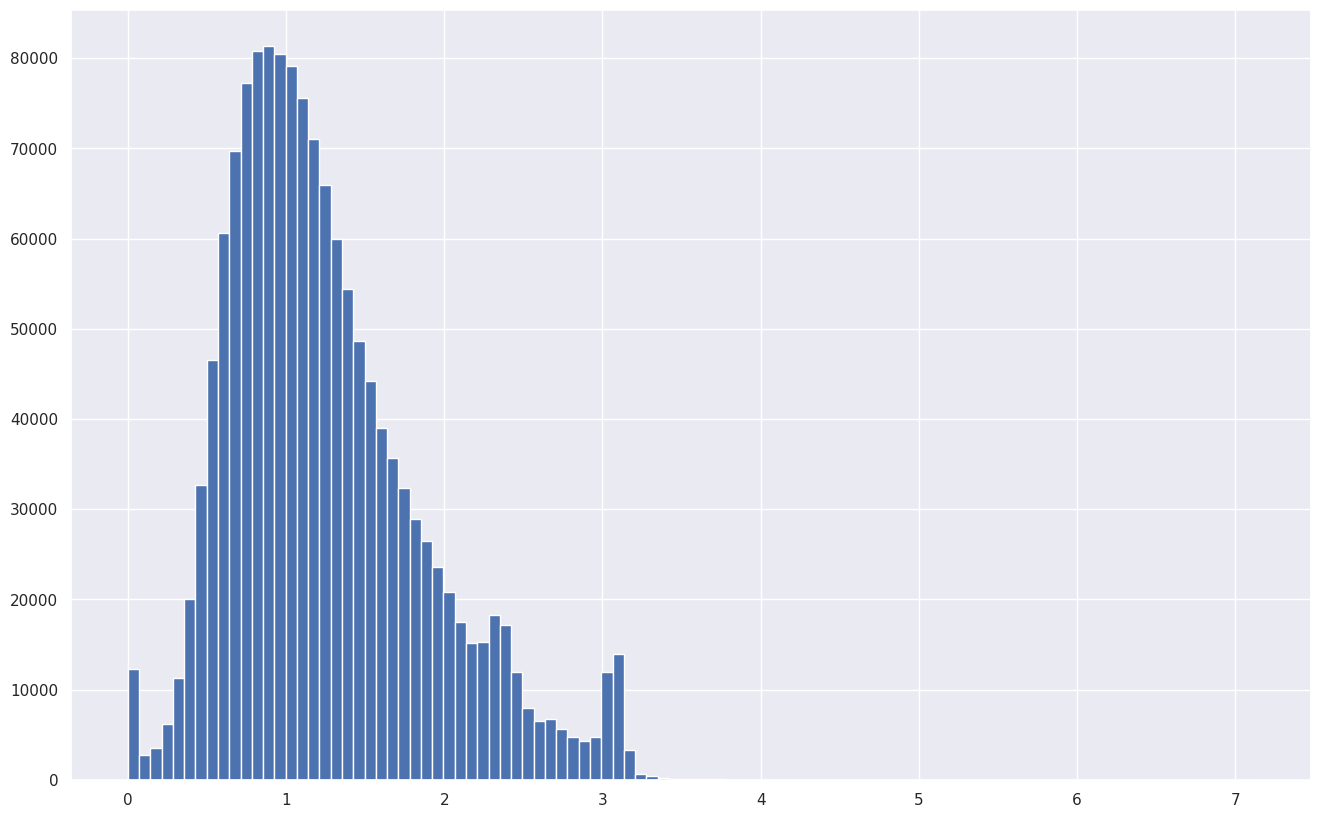

In [81]:
plt.hist(np.log1p(train.distance_haversine), bins=100)
plt.show()

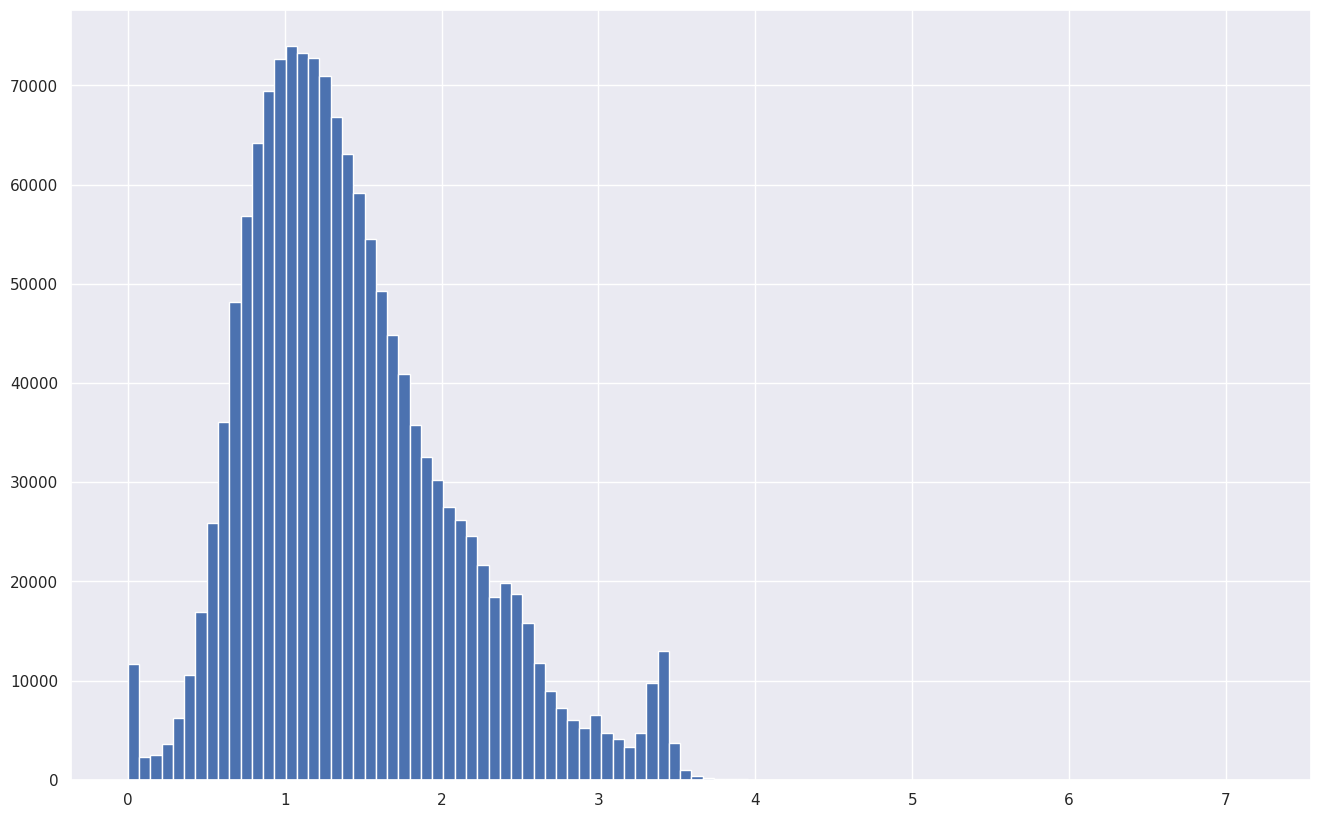

In [82]:
plt.hist(np.log1p(train.distance_dummy_manhattan), bins=100)
plt.show()

Выглядят достаточно одинаково.

Поисследуем теперь связь между расстоянием и продолжительностью поездки.

Text(0, 0.5, 'trip duration')

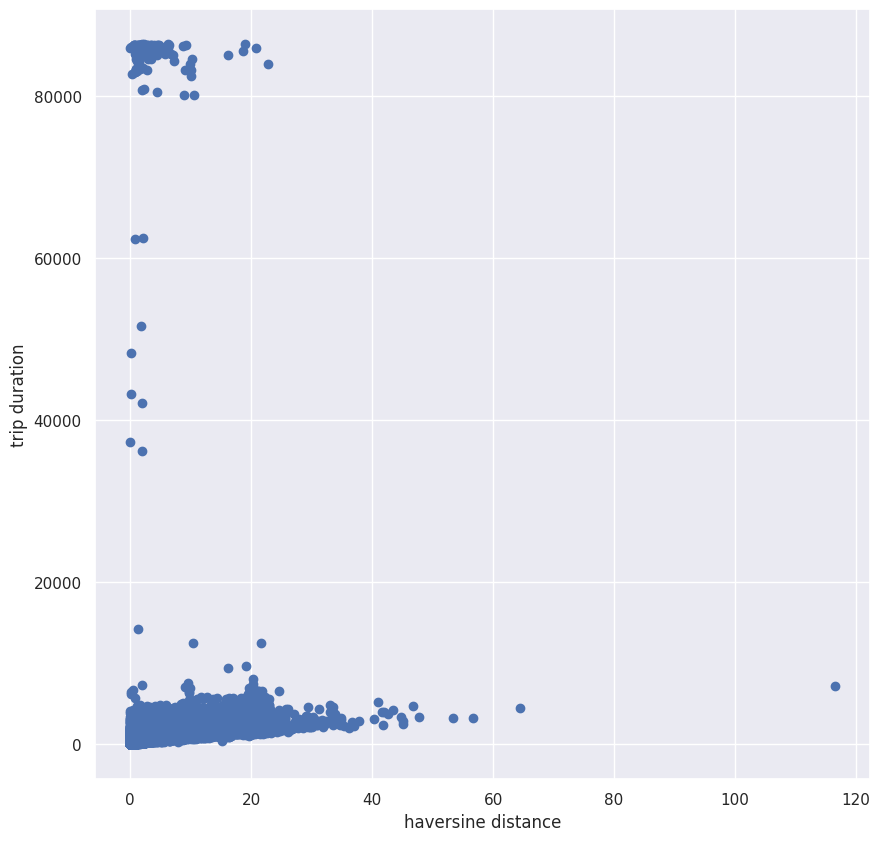

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(train.distance_haversine[:100000], train.trip_duration[:100000], marker='o')
plt.xlabel('haversine distance')
plt.ylabel('trip duration')

В нижней части графика точки неплохо выстраиваются в линию, но ещё есть некоторое количество выбросов. Нарисуем тот же график без них.

Text(0, 0.5, 'trip duration')

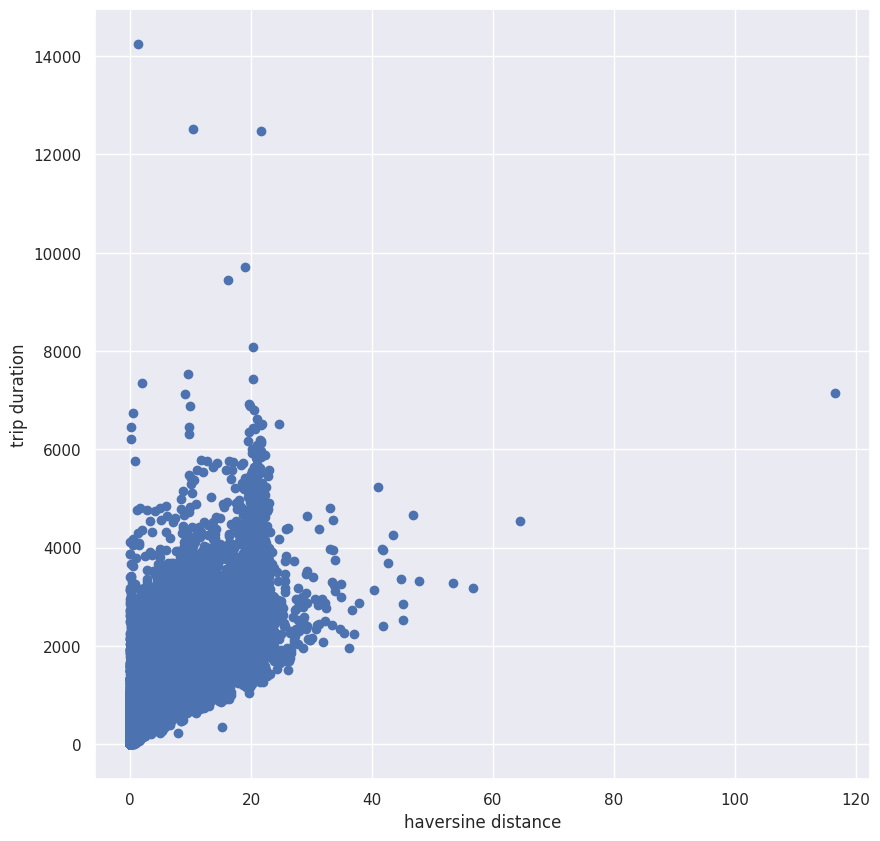

In [84]:
plt.figure(figsize=(10,10))
plt.scatter(train[train.trip_duration < 20000].distance_haversine[:100000],
            train[train.trip_duration < 20000].trip_duration[:100000], marker='o')
plt.xlabel('haversine distance')
plt.ylabel('trip duration')

Кажется, тут вполне может сработать линейная регрессия!

Ещё раз напомним, что расстояние не может быть признаком, его не посчитать для тестовой выборки. Но мы пока просто играемся.

In [85]:
from sklearn import linear_model, metrics

In [86]:
train_filtered = train[train.trip_duration < 20000]
X = train_filtered.distance_haversine.values[:, np.newaxis]
y = train_filtered.trip_duration.values

regr = linear_model.Ridge()
regr.fit(X, y)
metrics.mean_absolute_error(regr.predict(X), y)

299.65921803397475

In [87]:
train_filtered = train[train.trip_duration < 20000]
X = train_filtered.distance_dummy_manhattan.values[:, np.newaxis]
y = train_filtered.trip_duration.values

regr = linear_model.Ridge()
regr.fit(X, y)
metrics.mean_absolute_error(regr.predict(X), y)

306.0326596057465

То есть в среднем модель ошибается где-то на 300 секунд при предсказании продолжительности поездки. Как понять, хорошо это или плохо? Например, сравнить с качеством константной модели — например, которая всегда в качестве прогноза выдаёт медианное или среднее время поездки.

In [88]:
metrics.mean_absolute_error(np.median(y) * np.ones(y.shape), y)

444.8109724449668

In [89]:
metrics.mean_absolute_error(np.mean(y) * np.ones(y.shape), y)

468.0349997665766

### Почему важно исследовать данные?

Иногда бывает, что задача сложная, но при этом хорошего качества можно добиться с помощью простых правил. Причины могут быть разные:
* Разметка собрана по простому правилу. Например, для задачи предсказания тональности твитов могли сделать разметку через эмодзи — тогда достаточно, скажем, добавить признак "наличие в тексте подстроки ':)'".
* Задача действительно простая и не требует поиска закономерностей методами машинного обучения.
* В данных есть утечка (leak) — то есть в признаках содержится информация, которая на самом деле не должна быть доступна при построении прогноза.

Про некоторые истории с утечками можно почитать и посмотреть здесь:
* https://dyakonov.org/2018/06/28/простые-методы-анализа-данных/
* https://www.kaggle.com/c/the-icml-2013-whale-challenge-right-whale-redux/discussion/4865
* https://www.youtube.com/watch?v=UOxf2P9WnK8